In [1]:
import pandas as pd

In [2]:
lj_data = pd.read_csv('1_LJdata.csv')
#原始列名
lj_data.columns
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

In [3]:
# 查看基本状况
lj_data.head(5)
lj_data.info()
lj_data.shape
lj_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


,price,view_num
count,2760.000000,2760.000000
mean,7570.800725,13.448913
std,6316.204986,12.746202
min,1300.000000,0.000000
25%,4500.000000,4.000000
50%,6000.000000,10.000000
75%,8500.000000,19.000000
max,210000.000000,122.000000


In [6]:
# 最贵最便宜的房子
lj_data.loc[lj_data['price']==210000]
lj_data.loc[lj_data['price']==1300]
lj_data[lj_data['price']==lj_data['price'].min()]
lj_data[lj_data['price']==lj_data['price'].max()]
lj_data.sort_values(by='price').head(1)
lj_data.sort_values(by='price').tail(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2658,和平里租房,雍和家园二期,雍和家园 底商出租 使用面积720米,6室3厅,720平米,210000,低楼层(共6层),2005年建板楼,南,2017.07.26,21,距离2号线雍和宫站293米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101672514.html


In [7]:
# 最新的十套房子
lj_data.sort_values(by='update_time', ascending=False).head(10)
#查看所有更新时间
lj_data['update_time'].unique()

array(['2017.07.21', '2017.07.23', '2017.07.20', '2017.07.25',
       '2017.07.26', '2017.07.16', '2017.07.22', '2017.07.24',
       '2017.07.27', '2017.07.19', '2017.07.14', '2017.07.15',
       '2017.07.17', '2017.07.18'], dtype=object)

In [8]:
lj_data['view_num'].mean() #平均值
lj_data['view_num'].median() #中位数
# 不通过看房人数的房源数量
lj_data['view_num'].value_counts().to_frame().reset_index()
tmp_df.columns = ['view_num', 'count']
tmp_df.sort_values(by='view_num', inplace=True)
tmp_df.head()
#画图
%matplotlib inline
tmp_df['count'].plot(kind='bar')

NameError: name 'tmp_df' is not defined

In [9]:
# 房子年龄最小的十套房子的看房人数 平均面积
def get_front_4_num(x):
    try:
        return int(x[:4])
    except:
        return -1

lj_data.loc[:,'house_age'] = 2018-lj_data['build_time'].apply(get_front_4_num)

#面积空值判断
lj_data = lj_data[lj_data['area'].notnull()]
#截取面积数值部分
lj_data.loc[:,'area'] = lj_data['area'].apply(lambda x: x[:-2]).apply(lambda x:float(x))
#计算平均值

In [10]:
# 房子价格的分布
import numpy as np
print(lj_data['price'].mean())   #平均值
print(lj_data['price'].std())    #方差
print(lj_data['price'].median())  #中位数

7570.800724637681
6316.204986067457
6000.0


In [12]:
# 看房人数最多的朝向
popular_direction = lj_data.groupby('direction')[['view_num']].sum()
popular_direction = popular_direction.reset_index()
popular_direction[popular_direction['view_num']==popular_direction['view_num'].max()]

,direction,view_num
23,南 北,11785


C:\Users\cy176\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cy176\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cy176\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cy176\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cy176\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cy176\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23460 missing from c

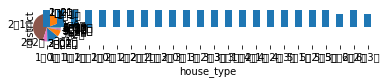

In [13]:
# 放行分布情况
house_type_dis = lj_data.groupby(['house_type']).count()
%matplotlib inline
house_type_dis['district'].plot(kind='pie') #饼图
house_type_dis['district'].plot(kind='bar') #柱状图

In [14]:
# 最受欢迎的房型
tmp = lj_data.groupby('house_type').agg({'view_num':'sum'})
tmp = tmp.reset_index()
tmp[tmp['view_num']==tmp['view_num'].max()]

,house_type,view_num
5,2室1厅,17589


In [15]:
# 房子的平均租房价格   元/平米
lj_data.loc[:,'price_per_m2'] = lj_data['price']/lj_data['area']
lj_data['price_per_m2'].mean()

87.72268429900429

In [16]:
# 热门小区
address_df = lj_data[['address','view_num']].groupby(['address']).sum()
address_df = address_df.reset_index()
address_df.sort_values(by='view_num', ascending=False)

,address,view_num
951,清芷园,246
369,卡布其诺,245
938,润枫水尚,217
1149,芍药居北里,194
743,新康园,186
1288,远洋山水,184
342,华贸城,176
15,万国城MOMA,176
1460,龙华园,171
1182,荣丰2008,170


In [17]:
# 出租房源最多的小区
tmp_df2 = lj_data[['address','view_num']].groupby(['address']).count()
tmp_df2 = tmp_df2.reset_index()
tmp_df2.columns =  ['address','count']
tmp_df2.nlargest(columns='count', n=1)

,address,count
1288,远洋山水,19


In [18]:
# 集中供暖  平均价格
def center_heating(x):
    return 1 if "集中供暖" in x else 0

lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x:center_heating(x))
lj_data['center_heating'].value_counts()
lj_data[['center_heating','price']].groupby('center_heating').mean()

,price
center_heating,
0,7317.436975
1,7623.603327


In [19]:
# 不同房型平均/最大/最小面积
house_type_info = lj_data[['house_type','area']].groupby("house_type")\
.agg({"area":{'mean':np.mean, 'max':np.max, 'min':np.min}})

C:\Users\cy176\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [20]:
# 那个地铁口房源最多
import re
#距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
def find_sub_station(x):
    try:
        return re.search(pattern="(.+号线)(.+站)([0-9]+)米", string=x).group(2)
    except:
        return None
lj_data.loc[:,'sub_station'] = lj_data['extra_info'].apply(find_sub_station)
#统计
lj_data[['sub_station','link']].groupby('sub_station').count()

,link
sub_station,
(东段)东湖渠站,21
(东段)东风北桥站,13
(东段)北工大西门站,8
(东段)将台站,14
(东段)方庄站,13
(东段)景泰站,8
(东段)望京南站,4
(东段)朝阳公园站,19
(东段)来广营站,5


In [22]:
# 是否有地铁 价格比较
def has_sub_station(x):
    return 1 if "距离" in x else 0

lj_data.loc[:,'has_sub_station'] = lj_data['extra_info'].apply(has_sub_station)

lj_data[['has_sub_station','price']].groupby('has_sub_station').agg('mean')

,price
has_sub_station,
0,6106.436464
1,8520.800478


In [23]:
# 地铁附近房源距离地铁平均距离
#距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
def cal_sub_station_distance(x):
    try:
        return int(re.search(pattern="(.+号线)(.+站)([0-9]+)米", string=x).group(3))
    except:
        return None

lj_data.loc[:,'distance'] = lj_data['extra_info'].apply(cal_sub_station_distance)

lj_data['distance'].mean()

709.1182364729459

In [25]:
# 租房房源楼层情况
def get_floor(x):
    if '低楼层' in x:
        return '低楼层'
    elif '中楼层' in x:
        return '中楼层'
    else:
        return '高楼层'

lj_data.loc[:,'floor'] = lj_data['extra_info'].apply(get_floor)